In [1]:
from __init__ import * 

In [2]:
device = 'cpu'

exp_name = 'ExpA_PR_no_reg'
lmbda = 0
toi = -1
N_iter_in = 500
N_iter_out = 2000
N = 6
cond = 'pos' # 'none'

exp_name = exp_name + '_' + str(lmbda) + '_' + str(toi) + '_' +  str(N) + '_' + str(N_iter_in) + '_' + str(N_iter_out) + '_' + cond

costs = torch.load('ExpA/saved_results/mrs_cost' + exp_name +'.pt' +'.pt')
losses = torch.load('ExpA/saved_results/mrs_loss' + exp_name +'.pt')
regs = torch.load('ExpA/saved_results/mrs_reg' + exp_name +'.pt')
mses = torch.load('ExpA/saved_results/mrs_mse' + exp_name +'.pt')
iters = torch.load('ExpA/saved_results/mrs_iters' + exp_name +'.pt')
times = torch.load('ExpA/saved_results/mrs_times' + exp_name +'.pt')

time_toal = torch.load('ExpA/saved_results/mrs_time_total' + exp_name +'.pt')

times GPU: [5.581702947616577, 4.849938154220581, 4.897338628768921, 4.333197832107544, 55.59143352508545, 72.58936500549316]
total time GPU: 147.8472867012024 seconds


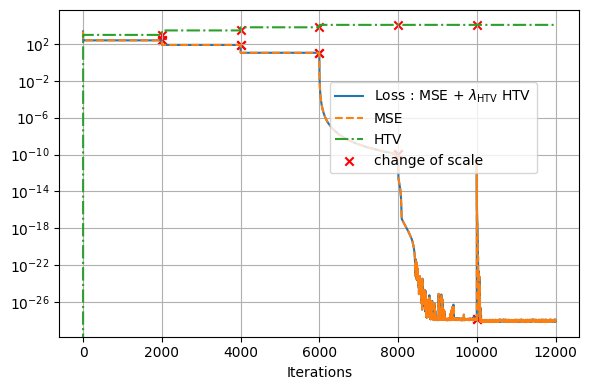

In [3]:
print('times GPU:', times)
print('total time GPU:', time_toal, 'seconds')
flat_loss = np.array([item for sublist in losses for item in sublist])
flat_mse = np.array([item for sublist in mses for item in sublist])
flat_reg = np.array([item for sublist in regs  for item in sublist])

scale_change = np.array( list(it.accumulate(iters[:-1]))).astype('int') - 1

plt.figure(figsize=(6, 4))
plt.plot(flat_loss, label='Loss : MSE + $\lambda_{\mathrm{HTV}}$ HTV')
plt.plot(flat_mse, label='MSE', linestyle='dashed')
plt.plot(flat_reg, label='HTV', linestyle='-.')
plt.yscale('log')
plt.grid('on')
plt.scatter(scale_change, flat_loss[scale_change], c='red', marker='x', label='change of scale')
plt.scatter(scale_change, flat_mse[scale_change], c='red', marker='x')
plt.scatter(scale_change, flat_reg[scale_change], c='red', marker='x')
plt.legend(loc=(0.52, 0.5))
plt.xlabel('Iterations')
plt.tight_layout()
plt.show()

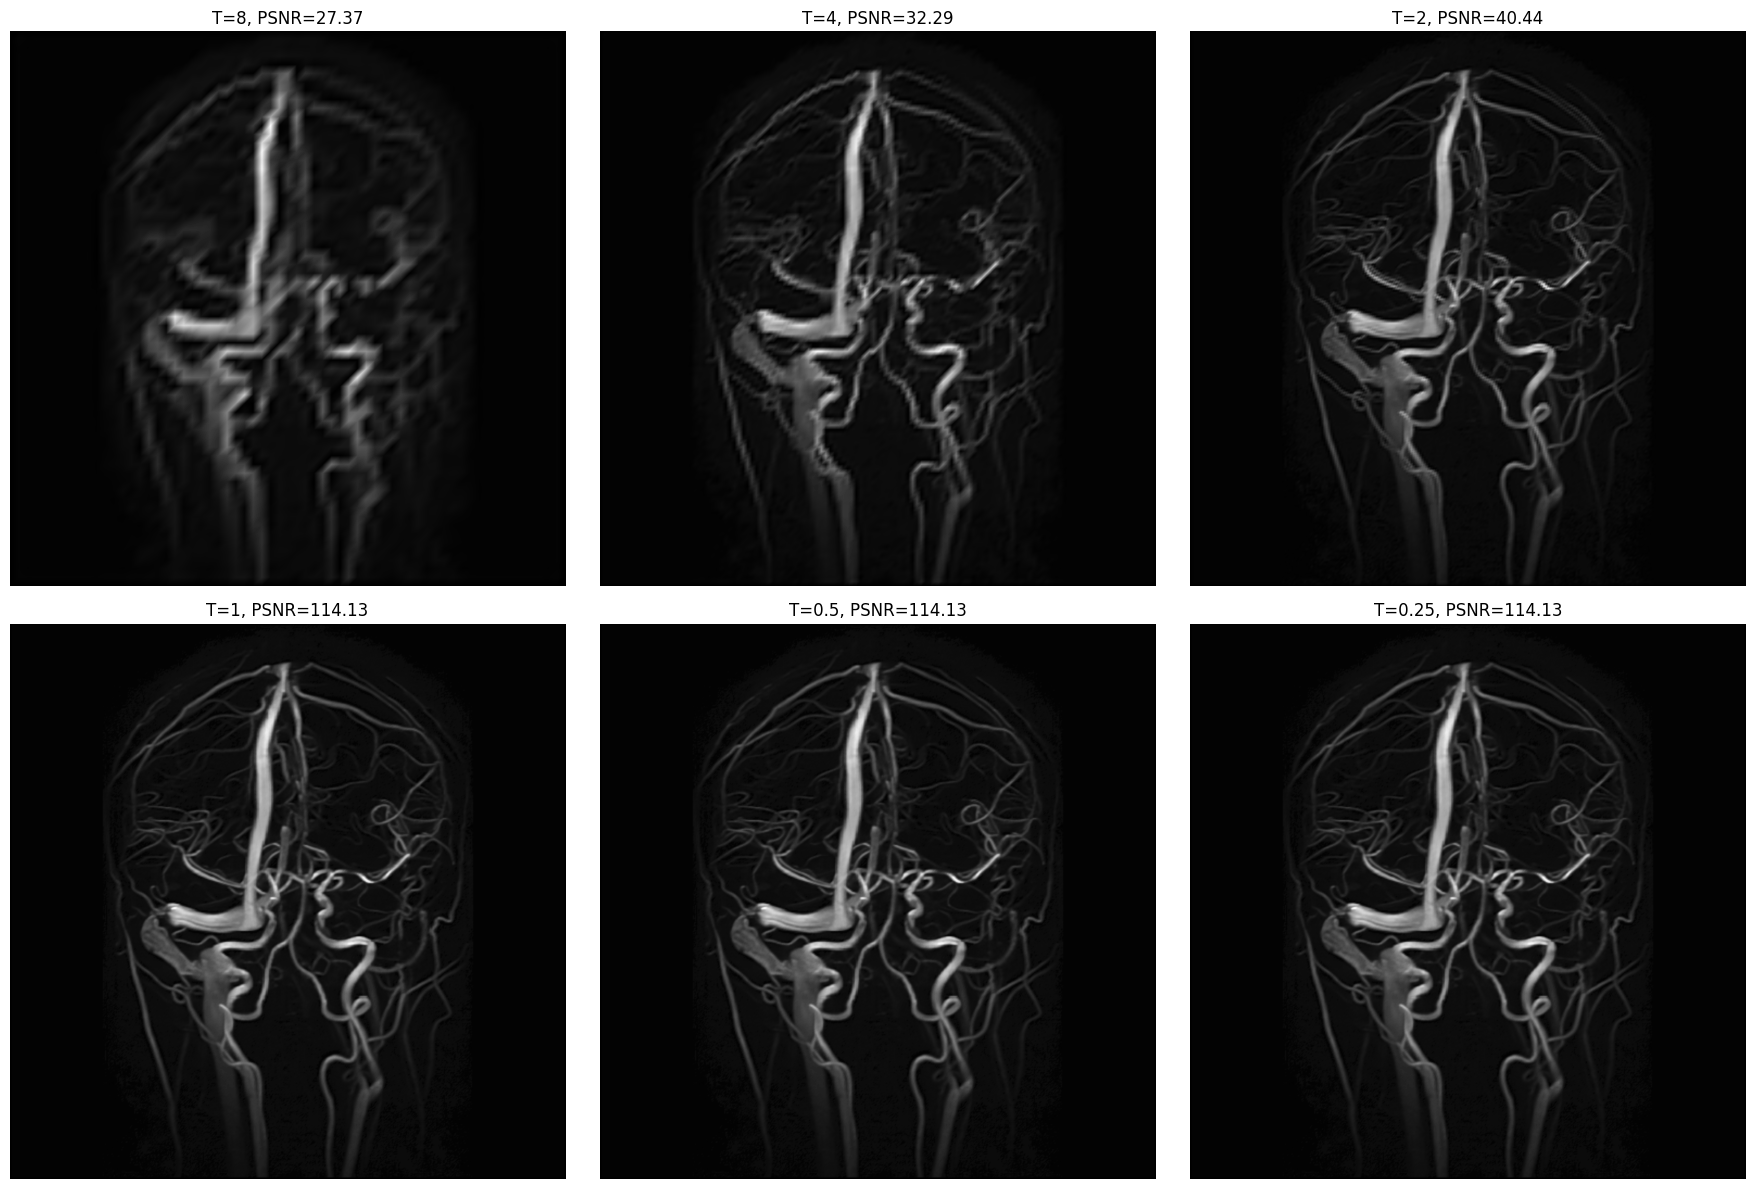

In [5]:
sampler = SamplerCPWL(device)
grid_eval = torch.load('ExpA/data/grid_eval.pt')
gt = torch.load('ExpA/data/gt_PR.pt')

plt.figure(figsize=(18, 12))
for i in range(N):
    sol = torch.load('ExpA/saved_results/mrs' + str(i)+ '_' +exp_name +'.pt')
    sol_grid = BoxGrid(sol.size(2), 0, 512, c_init=sol, device=device)
    eval_fine = sol_grid.evaluate(grid_eval).view(1, 1, 4096, 4096)

    psnr = np.round(compute_PSNR(eval_fine, gt, 1), 2)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(eval_fine[0, 0], cmap='gray'); plt.axis('off')
    plt.title('T=' + str(2**(-i+3)) + ', PSNR=' + str(psnr))

plt.subplots_adjust(wspace=0, hspace=0.05)
plt.tight_layout()
plt.show()
